## Challenge: Exercise 4

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Statistics about searches with bookings

In [2]:
import bz2
files_path = "/home/dsc/Repositories/Master-in-Data-Science/Data/"

##### Loading and formatting searches file

In [4]:
# Loading searches file
searches_file = bz2.BZ2File(files_path+"new_searches.csv.bz2")
searches_df = pd.read_csv(searches_file,sep='^',nrows=2e6, usecols=['Country','Date','Seg1Date','Is_Booked'])
searches_df = searches_df.dropna(subset=['Seg1Date'])

# Adding column with days between search and departure
searches_df['BookDate'] = pd.to_datetime(searches_df['Date'])
searches_df['DepDate'] = pd.to_datetime(searches_df['Seg1Date'])
searches_df['DiffDates'] = searches_df.DepDate-searches_df.BookDate
searches_df['DaysToDep'] = (pd.to_timedelta(searches_df['DiffDates'])/np.timedelta64(1, 'D')).astype(int)

##### Grouping by period search/departure

In [5]:
result_df = DataFrame(searches_df.groupby('DaysToDep')['Is_Booked'].sum())
result_df['TotSearched'] = searches_df.groupby('DaysToDep')['Is_Booked'].count()

# Adding column with rate_conversion
result_df['Rate_Conversion'] = result_df.Is_Booked/result_df.TotSearched*100
result_df.reset_index(inplace=True)
result_df.sort('DaysToDep',ascending=False,inplace=True)

#### Top searching days

In [6]:
result_df.sort('TotSearched',ascending=False).head(10)

,DaysToDep,Is_Booked,TotSearched,Rate_Conversion
3,3,4385,45927,9.547761
1,1,3364,42990,7.825076
2,2,2848,40241,7.077359
7,7,2592,39825,6.508475
4,4,2974,36876,8.064866
14,14,1962,35645,5.504278
5,5,2648,33690,7.859899
6,6,2344,33680,6.959620
8,8,2004,28509,7.029359
10,10,1636,28053,5.831818


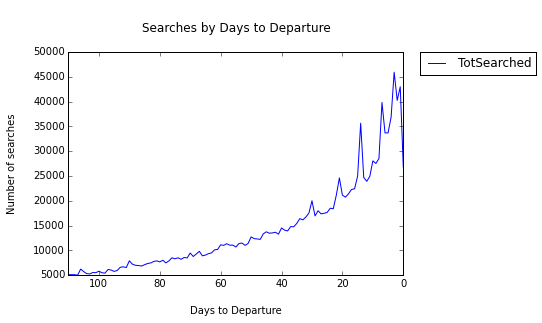

In [8]:
result_df[result_df['TotSearched'] > 5000 ]['TotSearched'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nSearches by Days to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Number of searches\n")
plt.show()

#### Top searching days with booking

In [9]:
result_df.sort('Is_Booked',ascending=False).head(10)

,DaysToDep,Is_Booked,TotSearched,Rate_Conversion
3,3,4385,45927,9.547761
1,1,3364,42990,7.825076
4,4,2974,36876,8.064866
2,2,2848,40241,7.077359
5,5,2648,33690,7.859899
7,7,2592,39825,6.508475
6,6,2344,33680,6.959620
8,8,2004,28509,7.029359
14,14,1962,35645,5.504278
0,0,1873,26808,6.986720


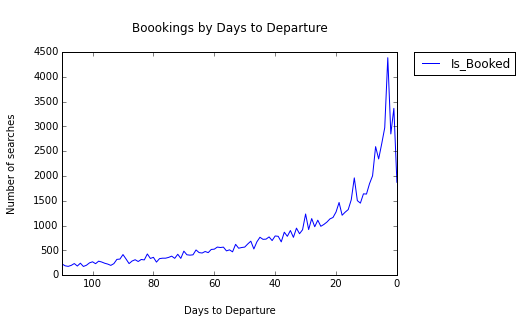

In [10]:
result_df[result_df['TotSearched'] > 5000]['Is_Booked'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nBoookings by Days to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Number of searches\n")
plt.show()

#### Top by rate_conversion searching days  

In [11]:
result_df[result_df.TotSearched > 5000].sort('Rate_Conversion',ascending=False).head(10)

,DaysToDep,Is_Booked,TotSearched,Rate_Conversion
3,3,4385,45927,9.547761
4,4,2974,36876,8.064866
5,5,2648,33690,7.859899
1,1,3364,42990,7.825076
2,2,2848,40241,7.077359
19,19,1466,20736,7.069830
8,8,2004,28509,7.029359
0,0,1873,26808,6.986720
6,6,2344,33680,6.959620
9,9,1845,27531,6.701536


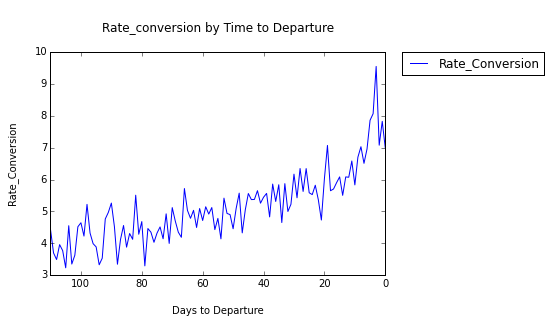

In [12]:
result_df[result_df['TotSearched'] > 5000 ]['Rate_Conversion'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nRate_conversion by Time to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Rate_Conversion\n")
plt.show()

### Statistics by Country

In [13]:
result_df = DataFrame(searches_df.groupby('Country')['Is_Booked'].sum())
result_df['TotSearched'] = searches_df.groupby('Country')['Is_Booked'].count()
# Adding column with rate_conversion
result_df['Rate_Conversion'] = result_df.Is_Booked/result_df.TotSearched*100
# Adding column with average DaysToDep
result_df['DaysToDep'] = searches_df.groupby('Country')['DaysToDep'].mean()

result_df.reset_index(inplace=True)

#### Top searching countries

In [14]:
result_df.sort('TotSearched',ascending=False).head(10)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
169,US,26878,555563,4.837975,71.643918
41,DE,14797,263888,5.607303,76.694848
56,GB,7364,139827,5.266508,83.050434
54,FR,4447,110860,4.011366,61.348638
48,ES,5455,103628,5.264021,61.840477
140,RU,1359,83828,1.621177,51.452438
25,CA,3627,82106,4.417460,65.764609
81,IT,1883,78607,2.395461,63.129594
21,BR,1519,70609,2.151284,66.558484
121,NL,1891,45951,4.115253,69.464952


#### Top travelling countries

In [15]:
result_df.sort('Is_Booked',ascending=False).head(10)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
169,US,26878,555563,4.837975,71.643918
41,DE,14797,263888,5.607303,76.694848
142,SA,7722,34742,22.226700,14.585689
56,GB,7364,139827,5.266508,83.050434
48,ES,5455,103628,5.264021,61.840477
54,FR,4447,110860,4.011366,61.348638
6,AU,3933,27666,14.216005,80.563435
25,CA,3627,82106,4.417460,65.764609
77,IN,3196,39763,8.037623,52.116591
121,NL,1891,45951,4.115253,69.464952


#### Top (and no) confident countries

In [18]:
result_df[result_df['TotSearched'] > 10000].sort('Rate_Conversion',ascending=False).head(5)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
142,SA,7722,34742,22.226700,14.585689
6,AU,3933,27666,14.216005,80.563435
158,TH,1537,14149,10.862959,64.516432
70,HK,960,10555,9.095216,62.797252
77,IN,3196,39763,8.037623,52.116591


In [19]:
result_df[result_df['TotSearched'] > 10000].sort('Rate_Conversion').head(5)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
166,UA,200,17385,1.150417,48.488927
140,RU,1359,83828,1.621177,51.452438
33,CN,191,10536,1.812832,60.173026
21,BR,1519,70609,2.151284,66.558484
81,IT,1883,78607,2.395461,63.129594


#### Top (and no) farsighted countries

In [20]:
result_df[result_df['TotSearched'] > 10000].sort('DaysToDep',ascending=False).head(5)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
56,GB,7364,139827,5.266508,83.050434
6,AU,3933,27666,14.216005,80.563435
41,DE,14797,263888,5.607303,76.694848
42,DK,811,16672,4.864443,72.047205
169,US,26878,555563,4.837975,71.643918


In [21]:
result_df[result_df['TotSearched'] > 10000].sort('DaysToDep').head(5)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
142,SA,7722,34742,22.226700,14.585689
166,UA,200,17385,1.150417,48.488927
140,RU,1359,83828,1.621177,51.452438
77,IN,3196,39763,8.037623,52.116591
162,TR,623,13422,4.641633,57.074952
